In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

# 1. Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше. 
Приклади:
https://github.com/natsakh/Data-Analysis/tree/main/Pr_5
https://keras.io/examples/structured_data/imbalanced_classification/

First, vectorize the CSV data

In [34]:
fname = '../Lab_1/letter+recognition/letter-recognition.data'
target = "lettr"

df = pd.read_csv(fname)

for i in range(len(df)):
    df.loc[i, "lettr"] = ord(df.loc[i, "lettr"]) - 65

num_classes = 26


features = np.array(df.drop([target], axis=1), dtype="float32")
targets = np.array(df[target], dtype="uint8")
print("features.shape:", features.shape)
print("targets.shape:", targets.shape)

features.shape: (20000, 16)
targets.shape: (20000,)


Prepare a validation set

In [35]:
x_train, x_temp, y_train, y_temp = train_test_split(features, targets, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("Number of training samples:", len(x_train))
print("Number of validation samples:", len(x_val))

Number of training samples: 12000
Number of validation samples: 4000


Text(0.5, 1.0, 'Problem')

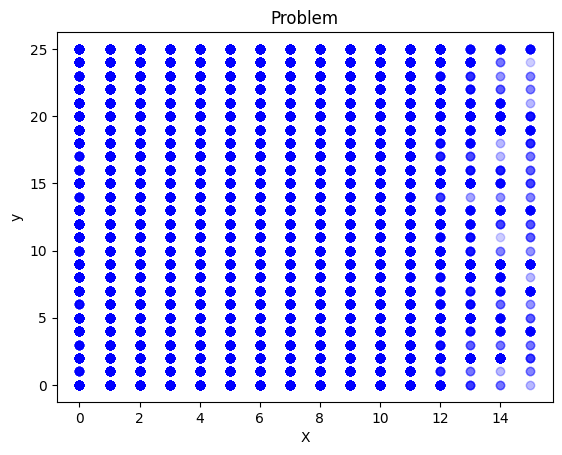

In [36]:
plt.plot(x_train, y_train, 'bo', alpha = 0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Problem')

Analyze class imbalance in the targets

In [37]:
counts = np.bincount(y_train)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 461 (3.84% of total)


Normalize the data using training set statistics

In [38]:
mean = np.mean(x_train, axis=0)
x_train -= mean
x_val -= mean
std = np.std(x_train, axis=0)
x_train /= std
x_val /= std

Build a binary classification model

In [39]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [40]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(26, activation="softmax")
])


# /model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/30


75/75 - 2s - 31ms/step - accuracy: 0.6927 - loss: 1.0807 - val_accuracy: 0.7829 - val_loss: 2.0773
Epoch 2/30
75/75 - 0s - 6ms/step - accuracy: 0.8557 - loss: 0.4793 - val_accuracy: 0.8587 - val_loss: 1.2643
Epoch 3/30
75/75 - 1s - 7ms/step - accuracy: 0.8947 - loss: 0.3249 - val_accuracy: 0.8892 - val_loss: 0.7206
Epoch 4/30
75/75 - 1s - 7ms/step - accuracy: 0.9167 - loss: 0.2582 - val_accuracy: 0.9296 - val_loss: 0.3773
Epoch 5/30
75/75 - 1s - 7ms/step - accuracy: 0.9325 - loss: 0.2092 - val_accuracy: 0.9221 - val_loss: 0.2850
Epoch 6/30
75/75 - 1s - 7ms/step - accuracy: 0.9430 - loss: 0.1775 - val_accuracy: 0.9342 - val_loss: 0.2029
Epoch 7/30
75/75 - 1s - 7ms/step - accuracy: 0.9529 - loss: 0.1431 - val_accuracy: 0.9488 - val_loss: 0.1643
Epoch 8/30
75/75 - 0s - 7ms/step - accuracy: 0.9553 - loss: 0.1312 - val_accuracy: 0.9463 - val_loss: 0.1648
Epoch 9/30
75/75 - 0s - 7ms/step - accuracy: 0.9602 - loss: 0.1203 - val_accuracy: 0.9483 - val_loss: 0.1482
Epoch 10/30
75/75 - 1s - 7ms/

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

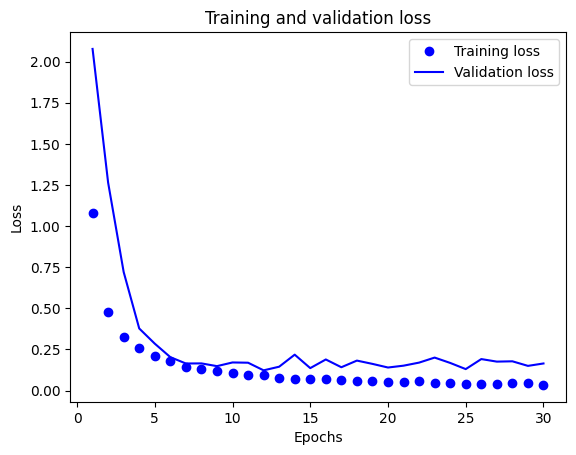

In [42]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [43]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 79.02721405029297
Test accuracy: 0.1354999989271164


In [44]:
for layer in model.layers: print(layer.get_weights())

[array([[-0.11111039,  0.03503758, -0.03173963, ..., -0.05054203,
        -0.00394775,  0.0225213 ],
       [ 0.06210303,  0.06684244,  0.08952377, ..., -0.02731153,
         0.01101563,  0.01727871],
       [ 0.05063195,  0.00968371, -0.08209648, ...,  0.09645638,
         0.02780117,  0.0401612 ],
       ...,
       [ 0.00346485,  0.06877783, -0.05434613, ..., -0.09125974,
         0.07328389,  0.03697797],
       [-0.03619116, -0.01133899,  0.03328313, ..., -0.18387038,
        -0.14450082, -0.18882899],
       [ 0.01783986,  0.00816909,  0.0858699 , ...,  0.12698852,
        -0.00219173,  0.10951655]], dtype=float32), array([-1.97322853e-02, -8.15278739e-02, -8.33948031e-02, -5.77089712e-02,
       -5.92180975e-02, -4.62383218e-02,  2.12907586e-02, -1.81748550e-02,
       -3.09952144e-02, -1.03372343e-01, -1.52594959e-02, -1.29053672e-03,
       -4.63171750e-02, -5.21484539e-02, -5.84934130e-02, -8.47981498e-02,
       -3.62594984e-02, -2.51195338e-02, -5.10041378e-02,  2.15415657e